In [4]:
#! pip install --upgrade matplotlib
#! pip install --upgrade matplotlib seaborn

In [5]:
# Importation de librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# un nouvel import utile pour la 3D:
from matplotlib import cm

# Les instructions suivantes sont TRES utiles pour recharger automatiquement 
# le code modifié dans les librairies externes
%load_ext autoreload
%autoreload 2

# Pour mesurer le temps
import time

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire père du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as classif

# importation de utils
from iads import utils as ut

# importation de evaluation
from iads import evaluation as ev

# importation de Clustering
from iads import Clustering as clust

# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
# Spécifiez le chemin vers votre fichier CSV
chemin_fichier = 'data.csv'

# Lire le fichier CSV en DataFrame
data = pd.read_csv(chemin_fichier)

data_test = pd.read_csv(chemin_fichier)

data_cours = pd.read_csv(chemin_fichier)

data_test_cours = pd.read_csv(chemin_fichier)

# Afficher les premières lignes du DataFrame
print(data.head())


   HIP  Vmag    Plx    B-V SpType    Distance  AbsoluteMag   Temperature
0    1  9.10   3.54  0.482     F5  282.485876     1.845016   6471.667826
1    2  9.27  21.90  0.999    K3V   45.662100     5.972221   4745.140425
2    3  6.61   2.81 -0.019     B9  355.871886    -1.146468  10368.595588
3    4  8.06   7.75  0.370    F0V  129.032258     2.506509   7044.130880
4    5  8.55   2.87  0.902  G8III  348.432056     0.839409   4991.060700


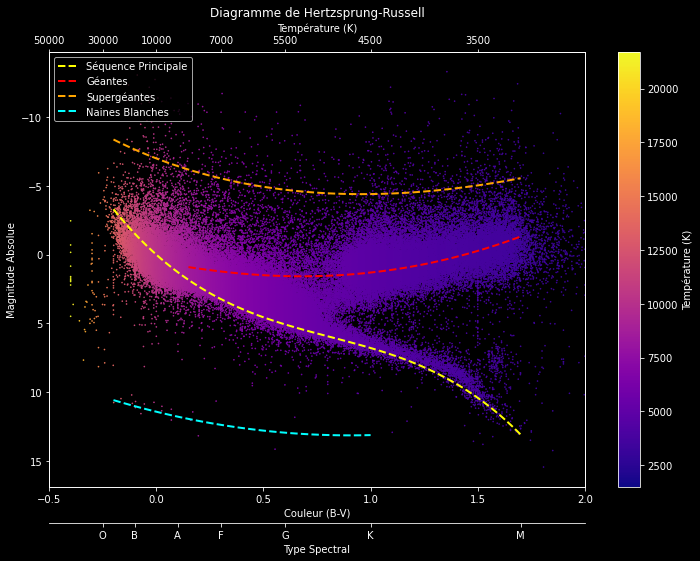

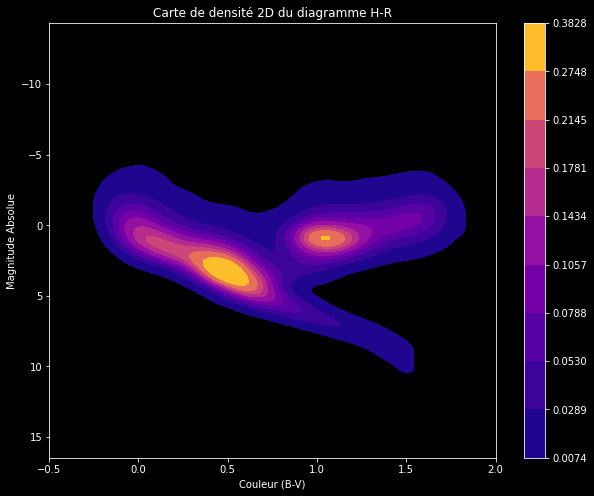

In [7]:
## Diagramme HR

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Importer les modules
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler




# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Définir les étiquettes de température et les types spectraux
temp_values = [50000, 30000, 10000, 7000, 5500, 4500, 3500]              # Étiquettes des températures
spectral_types_positions = [-0.25, -0.1, 0.1, 0.3, 0.6, 1.0, 1.7]        # Pour la position des étiquettes du type spectral
spectral_types = ['O', 'B', 'A', 'F', 'G', 'K', 'M']                     # Étiquettes du type spectral


# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Définir un fond noir uniforme
plt.style.use('dark_background')


# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Tracer le diagramme HR
fig, ax1 = plt.subplots(figsize=(12, 8))

sc = ax1.scatter(data['B-V'], data['AbsoluteMag'], s=0.4, c=data['Temperature'], cmap='plasma')
cb = plt.colorbar(sc, label='Température (K)')
ax1.invert_yaxis()  # Inverser l'axe des magnitudes pour correspondre à la convention HR
ax1.set_xlabel('Couleur (B-V)')
ax1.set_ylabel('Magnitude Absolue')
ax1.set_xlim(-0.5, 2.0)
ax1.set_title('Diagramme de Hertzsprung-Russell')



# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Ajouter l'axe supérieur pour la température
ax2 = ax1.twiny()                                        # Création d'un nouvel axe 'ax2' qui partage le même axe des ordonnées avec 'ax1'
ax2.set_xlim(ax1.get_xlim())                             # Assurer que les limites de l'axe des abscisses de ax2 correspondent à celles de ax1 pour un alignement correct
ax2.set_xticks([-0.5, -0.25, 0.0, 0.3, 0.6, 1.0, 1.5])   # Pour la position des étiquettes de température
ax2.set_xticklabels(temp_values)                         # Définir les étiquettes des graduations sur l'axe des abscisses de ax2 avec les valeurs de température
ax2.set_xlabel('Température (K)')


# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Ajouter un deuxième axe pour les types spectraux
ax3 = ax1.twiny()
ax3.set_xticks(spectral_types_positions)
ax3.set_xticklabels(spectral_types[:len(spectral_types_positions)])
ax3.xaxis.set_ticks_position('bottom')                  # Placer les graduations de l'axe des abscisses de ax3 en bas du graphique
ax3.xaxis.set_label_position('bottom')                  # Positionner l'étiquette de l'axe des abscisses de ax3 en bas du graphique
ax3.set_xlabel('Type Spectral')
ax3.spines['bottom'].set_position(('outward', 36))      # Ajustement de la position vers le bas
ax3.set_xlim(ax1.get_xlim())


# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Courbe ajustée de la séquence principale
def plot_sequence_principale(ax):
    bv_seq_princ = np.linspace(-0.2, 1.7, 100)                                        # Générer des valeurs de B-V couvrant la séquence principale
    abs_mag_seq_princ = 4.95 * bv_seq_princ**3 - 12.07 * bv_seq_princ**2 + 13.91 * bv_seq_princ - 0 # Calculer la magnitude absolue correspondante pour chaque valeur de BV 
    ax.plot(bv_seq_princ, abs_mag_seq_princ, color='yellow', linestyle='--', linewidth=2, label='Séquence Principale') # Tracer la séquence principale sur le graphique

plot_sequence_principale(ax1)


# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Courbe ajustée de la branche des géantes rouges 
def plot_geantes(ax):
    bv_geantes = np.linspace(0.15, 1.7, 100)
    abs_mag_geantes = -2.1 * bv_geantes**2.2 + 2.9 * bv_geantes + 0.5
    ax.plot(bv_geantes, abs_mag_geantes, color='red', linestyle='--', linewidth=2, label='Géantes')

plot_geantes(ax1)


# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Courbe ajustée de la branche des supergéantes
def plot_supergiantes(ax):
    bv_superg = np.linspace(-0.2, 1.7, 100)
    abs_mag_superg = - 6 * np.exp(-bv_superg) - 1.2 * bv_superg**2 - 1
    ax.plot(bv_superg, abs_mag_superg, color='orange', linestyle='--', linewidth=2, label='Supergéantes')

plot_supergiantes(ax1)


# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Courbe ajustée de la branche des naines blanches
def plot_naines_blanches(ax):
    bv_naine_blanche = np.linspace(-0.2, 1.0, 100)
    abs_mag_naine_blanche = -2.1 * (bv_naine_blanche + 0.5)**2 + 5.9 * (bv_naine_blanche + 0.5) + 9
    ax.plot(bv_naine_blanche, abs_mag_naine_blanche, color='cyan', linestyle='--', linewidth=2, label='Naines Blanches')

plot_naines_blanches(ax1)


# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Afficher la légende en haut à gauche
ax1.legend(loc='upper left')
plt.show()


# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Carte de densité 2D du diagramme HR

# Définir la taille de la figure
plt.figure(figsize=(10, 8))

# Créer une carte de densité 2D avec les données 'B-V' et 'AbsoluteMag'
sns.kdeplot(
    x=data['B-V'],              # Axe x correspondant à la colonne 'B-V' des données
    y=data['AbsoluteMag'],      # Axe y correspondant à la colonne 'AbsoluteMag' des données
    cmap="plasma",              # Utiliser la palette de couleurs 'plasma' pour la densité
    fill=True,                  # Remplir les contours de la densité pour une meilleure visualisation
    cbar=True                   # Ajouter une barre de couleur pour indiquer l'échelle de densité
)

# Inverser l'axe y pour que les valeurs plus élevées soient en bas, comme dans un diagramme H-R typique
plt.gca().invert_yaxis()

# Ajouter un label à l'axe x
plt.xlabel('Couleur (B-V)')

# Ajouter un label à l'axe y
plt.ylabel('Magnitude Absolue')

# Ajouter un titre à la figure
plt.title('Carte de densité 2D du diagramme H-R')

# Ajouter une limite à l'axe des abscisses
plt.xlim(-0.5, 2)

# Afficher la figure
plt.show()




## K-moyennes

    HIP : Numéro attribué à chaque étoile
        Commentaire : C'est un identifiant unique pour chaque étoile et ne contient pas d'information utile pour le clustering.
        Recommandation : À écarter

    Vmag : Magnitude apparente
        Commentaire : La magnitude apparente peut être influencée par la distance de l'étoile, mais elle donne une indication de la luminosité vue depuis la Terre. Cependant, la magnitude absolue est plus pertinente.
        Recommandation : Peut être utile, mais la magnitude absolue est plus pertinente

    Plx : Angle de vue de l’étoile
        Commentaire : Utilisé pour calculer la distance de l'étoile. Directement, ce n'est pas une caractéristique distinctive des types d'étoiles.
        Recommandation : À écarter

    B-V : Indice de couleur (différence de magnitude entre les filtres bleu et visuel)
        Commentaire : Cet indice est une bonne mesure de la température de l'étoile et est donc très pertinent pour le clustering.
        Recommandation : À utiliser

    SpType : Type spectral des étoiles
        Commentaire : Classe les étoiles selon leur température et autres caractéristiques. C'est une caractéristique très pertinente pour le clustering, mais nécessite une conversion en numérique.
        Recommandation : À utiliser (après conversion en numérique)

    Distance : Distance entre l’étoile et le Soleil
        Commentaire : La distance en soi ne distingue pas les types d'étoiles. C'est utile pour calculer d'autres caractéristiques, mais pas directement pour le clustering.
        Recommandation : À écarter

    AbsoluteMag : Magnitude absolue
        Commentaire : Permet de mesurer la luminosité intrinsèque de l'étoile, indépendante de la distance. C'est une caractéristique très pertinente pour le clustering.
        Recommandation : À utiliser

    Temperature : Température de surface de l’étoile en Kelvin
        Commentaire : La température de surface est une caractéristique clé pour différencier les types d'étoiles.
        Recommandation : À utiliser

Caractéristiques à écarter du dataset pour le clustering :

    HIP : Identifiant unique, donc pas utile pour le clustering.
    Plx : Utilisé pour calculer la distance, mais pas pertinent directement pour le clustering.
    Distance : Pas directement utile pour distinguer les types d'étoiles.

Caractéristiques à conserver pour le clustering :

    Vmag : Magnitude apparente (secondaire, si AbsoluteMag est utilisée)
    B-V : Indice de couleur
    SpType : Type spectral (après conversion en numérique)
    AbsoluteMag : Magnitude absolue
    Temperature : Température de surface

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# Convertir le type spectral en numérique
data['SpType_numeric'] = data['SpType'].astype('category').cat.codes

# Sélectionner les caractéristiques pertinentes
features = ['B-V', 'SpType_numeric', 'Vmag', 'AbsoluteMag', 'Temperature']

# Vérifier les valeurs manquantes
print("Valeurs manquantes avant le nettoyage :")
print(data[features].isnull().sum())

# Remplacer les valeurs manquantes par la moyenne de la colonne
data[features] = data[features].fillna(data[features].mean())

# Vérifier les valeurs infinies
print("\nValeurs infinies avant le nettoyage :")
print(np.isfinite(data[features]).all())

# Remplacer les valeurs infinies par la moyenne de la colonne
data[features] = data[features].replace([np.inf, -np.inf], np.nan)
data[features] = data[features].fillna(data[features].mean())

# Vérifier les valeurs trop grandes (si nécessaire)
# Par exemple, ici on n'attend pas de valeurs très grandes pour les caractéristiques choisies.

# Normaliser les données
scaler = StandardScaler()
df_scaled = scaler.fit_transform(data[features])

# Appliquer le clustering
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(df_scaled)

# Afficher les résultats
print("\nRésultats du clustering :")
print(data[['HIP', 'Cluster']])


Valeurs manquantes avant le nettoyage :
B-V               887
SpType_numeric      0
Vmag                0
AbsoluteMag         0
Temperature       887
dtype: int64

Valeurs infinies avant le nettoyage :
B-V               True
SpType_numeric    True
Vmag              True
AbsoluteMag       True
Temperature       True
dtype: bool

Résultats du clustering :
           HIP  Cluster
0            1        1
1            2        3
2            3        2
3            4        1
4            5        0
...        ...      ...
113705  118318        0
113706  118319        1
113707  118320        0
113708  118321        3
113709  118322        2

[113710 rows x 2 columns]


In [9]:
print(data)

           HIP  Vmag    Plx    B-V SpType    Distance  AbsoluteMag  \
0            1  9.10   3.54  0.482     F5  282.485876     1.845016   
1            2  9.27  21.90  0.999    K3V   45.662100     5.972221   
2            3  6.61   2.81 -0.019     B9  355.871886    -1.146468   
3            4  8.06   7.75  0.370    F0V  129.032258     2.506509   
4            5  8.55   2.87  0.902  G8III  348.432056     0.839409   
...        ...   ...    ...    ...    ...         ...          ...   
113705  118318  6.99   1.92  1.595     K2  520.833333    -1.593494   
113706  118319  8.23  10.63  0.639    G2V   94.073377     3.362666   
113707  118320  7.59   5.00  0.999     K0  200.000000     1.084850   
113708  118321  9.20  19.22  0.698    G5V   52.029136     5.618767   
113709  118322  4.49   8.71 -0.075   B9IV  114.810563    -0.809909   

         Temperature  SpType_numeric  Cluster  
0        6471.667826            1809        1  
1        4745.140425            3178        3  
2       10368.5

In [10]:
data_test['Cluster'] = data['Cluster']

print(data_test.head())

   HIP  Vmag    Plx    B-V SpType    Distance  AbsoluteMag   Temperature  \
0    1  9.10   3.54  0.482     F5  282.485876     1.845016   6471.667826   
1    2  9.27  21.90  0.999    K3V   45.662100     5.972221   4745.140425   
2    3  6.61   2.81 -0.019     B9  355.871886    -1.146468  10368.595588   
3    4  8.06   7.75  0.370    F0V  129.032258     2.506509   7044.130880   
4    5  8.55   2.87  0.902  G8III  348.432056     0.839409   4991.060700   

   Cluster  
0        1  
1        3  
2        2  
3        1  
4        0  


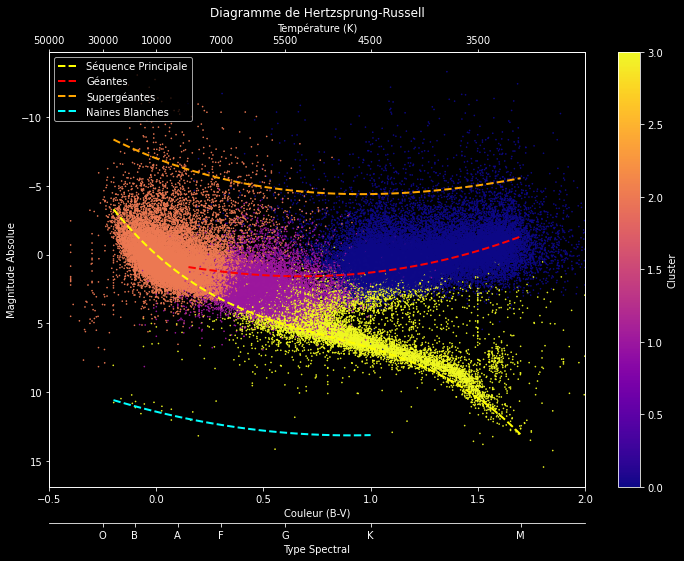

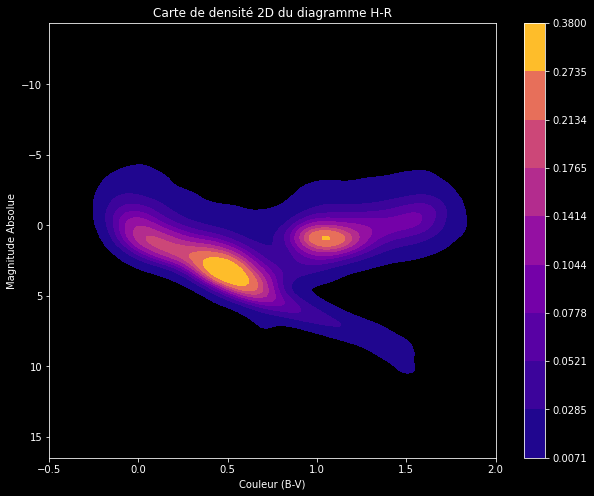

In [11]:
## Diagramme HR

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Importer les modules
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler




# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Définir les étiquettes de température et les types spectraux
temp_values = [50000, 30000, 10000, 7000, 5500, 4500, 3500]              # Étiquettes des températures
spectral_types_positions = [-0.25, -0.1, 0.1, 0.3, 0.6, 1.0, 1.7]        # Pour la position des étiquettes du type spectral
spectral_types = ['O', 'B', 'A', 'F', 'G', 'K', 'M']                     # Étiquettes du type spectral


# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Définir un fond noir uniforme
plt.style.use('dark_background')


# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Tracer le diagramme HR
fig, ax1 = plt.subplots(figsize=(12, 8))

sc = ax1.scatter(data_test['B-V'], data_test['AbsoluteMag'], s=0.4, c=data_test['Cluster'], cmap='plasma')
cb = plt.colorbar(sc, label='Cluster')
ax1.invert_yaxis()  # Inverser l'axe des magnitudes pour correspondre à la convention HR
ax1.set_xlabel('Couleur (B-V)')
ax1.set_ylabel('Magnitude Absolue')
ax1.set_xlim(-0.5, 2.0)
ax1.set_title('Diagramme de Hertzsprung-Russell')



# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Ajouter l'axe supérieur pour la température
ax2 = ax1.twiny()                                        # Création d'un nouvel axe 'ax2' qui partage le même axe des ordonnées avec 'ax1'
ax2.set_xlim(ax1.get_xlim())                             # Assurer que les limites de l'axe des abscisses de ax2 correspondent à celles de ax1 pour un alignement correct
ax2.set_xticks([-0.5, -0.25, 0.0, 0.3, 0.6, 1.0, 1.5])   # Pour la position des étiquettes de température
ax2.set_xticklabels(temp_values)                         # Définir les étiquettes des graduations sur l'axe des abscisses de ax2 avec les valeurs de température
ax2.set_xlabel('Température (K)')


# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Ajouter un deuxième axe pour les types spectraux
ax3 = ax1.twiny()
ax3.set_xticks(spectral_types_positions)
ax3.set_xticklabels(spectral_types[:len(spectral_types_positions)])
ax3.xaxis.set_ticks_position('bottom')                  # Placer les graduations de l'axe des abscisses de ax3 en bas du graphique
ax3.xaxis.set_label_position('bottom')                  # Positionner l'étiquette de l'axe des abscisses de ax3 en bas du graphique
ax3.set_xlabel('Type Spectral')
ax3.spines['bottom'].set_position(('outward', 36))      # Ajustement de la position vers le bas
ax3.set_xlim(ax1.get_xlim())


# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Courbe ajustée de la séquence principale
def plot_sequence_principale(ax):
    bv_seq_princ = np.linspace(-0.2, 1.7, 100)                                        # Générer des valeurs de B-V couvrant la séquence principale
    abs_mag_seq_princ = 4.95 * bv_seq_princ**3 - 12.07 * bv_seq_princ**2 + 13.91 * bv_seq_princ - 0 # Calculer la magnitude absolue correspondante pour chaque valeur de BV 
    ax.plot(bv_seq_princ, abs_mag_seq_princ, color='yellow', linestyle='--', linewidth=2, label='Séquence Principale') # Tracer la séquence principale sur le graphique

plot_sequence_principale(ax1)


# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Courbe ajustée de la branche des géantes rouges 
def plot_geantes(ax):
    bv_geantes = np.linspace(0.15, 1.7, 100)
    abs_mag_geantes = -2.1 * bv_geantes**2.2 + 2.9 * bv_geantes + 0.5
    ax.plot(bv_geantes, abs_mag_geantes, color='red', linestyle='--', linewidth=2, label='Géantes')

plot_geantes(ax1)


# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Courbe ajustée de la branche des supergéantes
def plot_supergiantes(ax):
    bv_superg = np.linspace(-0.2, 1.7, 100)
    abs_mag_superg = - 6 * np.exp(-bv_superg) - 1.2 * bv_superg**2 - 1
    ax.plot(bv_superg, abs_mag_superg, color='orange', linestyle='--', linewidth=2, label='Supergéantes')

plot_supergiantes(ax1)


# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Courbe ajustée de la branche des naines blanches
def plot_naines_blanches(ax):
    bv_naine_blanche = np.linspace(-0.2, 1.0, 100)
    abs_mag_naine_blanche = -2.1 * (bv_naine_blanche + 0.5)**2 + 5.9 * (bv_naine_blanche + 0.5) + 9
    ax.plot(bv_naine_blanche, abs_mag_naine_blanche, color='cyan', linestyle='--', linewidth=2, label='Naines Blanches')

plot_naines_blanches(ax1)


# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Afficher la légende en haut à gauche
ax1.legend(loc='upper left')
plt.show()


# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Carte de densité 2D du diagramme HR

# Définir la taille de la figure
plt.figure(figsize=(10, 8))

# Créer une carte de densité 2D avec les données 'B-V' et 'AbsoluteMag'
sns.kdeplot(
    x=data['B-V'],              # Axe x correspondant à la colonne 'B-V' des données
    y=data['AbsoluteMag'],      # Axe y correspondant à la colonne 'AbsoluteMag' des données
    cmap="plasma",              # Utiliser la palette de couleurs 'plasma' pour la densité
    fill=True,                  # Remplir les contours de la densité pour une meilleure visualisation
    cbar=True                   # Ajouter une barre de couleur pour indiquer l'échelle de densité
)

# Inverser l'axe y pour que les valeurs plus élevées soient en bas, comme dans un diagramme H-R typique
plt.gca().invert_yaxis()

# Ajouter un label à l'axe x
plt.xlabel('Couleur (B-V)')

# Ajouter un label à l'axe y
plt.ylabel('Magnitude Absolue')

# Ajouter un titre à la figure
plt.title('Carte de densité 2D du diagramme H-R')

# Ajouter une limite à l'axe des abscisses
plt.xlim(-0.5, 2)

# Afficher la figure
plt.show()







### Modèle du cours

Valeurs manquantes avant le nettoyage :
B-V               0
SpType_numeric    0
Vmag              0
AbsoluteMag       0
Temperature       0
dtype: int64

Valeurs infinies avant le nettoyage :
B-V               True
SpType_numeric    True
Vmag              True
AbsoluteMag       True
Temperature       True
dtype: bool
iteration  1  Inertie :  201607.079775304  Difference :  7.220828663620888
iteration  2  Inertie :  194348.72975965956  Difference :  0.3567480351407561
iteration  3  Inertie :  192305.89365198108  Difference :  0.2213291656420456
iteration  4  Inertie :  191264.588977315  Difference :  3.1560127924285593
iteration  5  Inertie :  190637.9958216529  Difference :  0.1279605752542304
iteration  6  Inertie :  190233.44984536065  Difference :  0.10657785224873388
iteration  7  Inertie :  189958.20557305455  Difference :  0.08814437670693039
iteration  8  Inertie :  189768.23515125882  Difference :  0.07602795752945621
iteration  9  Inertie :  189616.3781798086  Difference :  3.

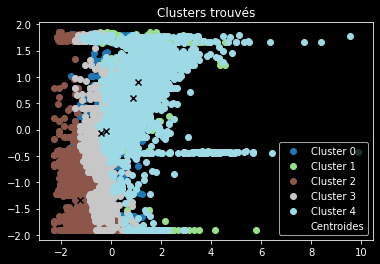

In [24]:
# Convertir le type spectral en numérique
data_cours['SpType_numeric'] = data_cours['SpType'].astype('category').cat.codes

# Sélectionner les caractéristiques pertinentes
features = ['B-V', 'SpType_numeric', 'Vmag', 'AbsoluteMag', 'Temperature']

# Vérifier les valeurs manquantes
print("Valeurs manquantes avant le nettoyage :")
print(data_cours[features].isnull().sum())

# Remplacer les valeurs manquantes par la moyenne de la colonne
data_cours[features] = data_cours[features].fillna(data_cours[features].mean())

# Vérifier les valeurs infinies
print("\nValeurs infinies avant le nettoyage :")
print(np.isfinite(data_cours[features]).all())

# Remplacer les valeurs infinies par la moyenne de la colonne
data_cours[features] = data_cours[features].replace([np.inf, -np.inf], np.nan)
data_cours[features] = data_cours[features].fillna(data_cours[features].mean())

# Vérifier les valeurs trop grandes (si nécessaire)
# Par exemple, ici on n'attend pas de valeurs très grandes pour les caractéristiques choisies.

# Normaliser les données
scaler = StandardScaler()
df_scaled = scaler.fit_transform(data_cours[features])


# Appliquer le clustering
val_k = 5
les_centres, l_affectation = clust.kmoyennes(val_k, df_scaled, 0.05, 100)

#print("Pour k=",val_k,"\nAffichage des centres: ",les_centres)
print("Affichage des affectations: ",l_affectation)

clust.affiche_resultat(df_scaled,les_centres,l_affectation)



In [25]:
# Créer une série pour les correspondances index -> clé
correspondance = {}
for key, values in l_affectation.items():
    for value in values:
        correspondance[value] = key

# Convertir le dictionnaire de correspondances en une série
correspondance_serie = pd.Series(correspondance)


# Ajouter une nouvelle colonne au DataFrame en utilisant la série de correspondances
data_test_cours['Cluster'] = data_test_cours.index.map(correspondance_serie)
data_test_cours


,HIP,Vmag,Plx,B-V,SpType,Distance,AbsoluteMag,Temperature,Cluster
0,1,9.10,3.54,0.482,F5,282.485876,1.845016,6471.667826,0
1,2,9.27,21.90,0.999,K3V,45.662100,5.972221,4745.140425,1
2,3,6.61,2.81,-0.019,B9,355.871886,-1.146468,10368.595588,2
3,4,8.06,7.75,0.370,F0V,129.032258,2.506509,7044.130880,3
4,5,8.55,2.87,0.902,G8III,348.432056,0.839409,4991.060700,4
...,...,...,...,...,...,...,...,...,...
113705,118318,6.99,1.92,1.595,K2,520.833333,-1.593494,3655.993639,4
113706,118319,8.23,10.63,0.639,G2V,94.073377,3.362666,5818.920292,3
113707,118320,7.59,5.00,0.999,K0,200.000000,1.084850,4745.140425,4
113708,118321,9.20,19.22,0.698,G5V,52.029136,5.618767,5608.544902,0


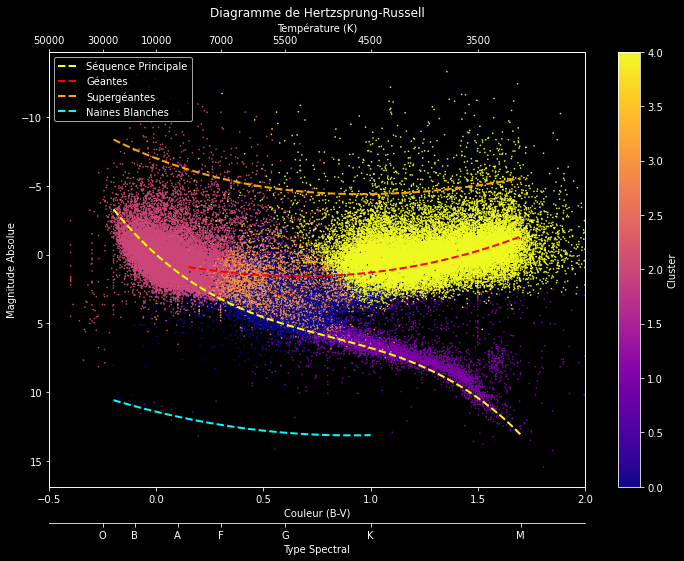

In [27]:
## Diagramme HR

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Importer les modules
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler




# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Définir les étiquettes de température et les types spectraux
temp_values = [50000, 30000, 10000, 7000, 5500, 4500, 3500]              # Étiquettes des températures
spectral_types_positions = [-0.25, -0.1, 0.1, 0.3, 0.6, 1.0, 1.7]        # Pour la position des étiquettes du type spectral
spectral_types = ['O', 'B', 'A', 'F', 'G', 'K', 'M']                     # Étiquettes du type spectral


# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Définir un fond noir uniforme
plt.style.use('dark_background')


# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Tracer le diagramme HR
fig, ax1 = plt.subplots(figsize=(12, 8))

sc = ax1.scatter(data_test_cours['B-V'], data_test_cours['AbsoluteMag'], s=0.4, c=data_test_cours['Cluster'], cmap='plasma')
cb = plt.colorbar(sc, label='Cluster')
ax1.invert_yaxis()  # Inverser l'axe des magnitudes pour correspondre à la convention HR
ax1.set_xlabel('Couleur (B-V)')
ax1.set_ylabel('Magnitude Absolue')
ax1.set_xlim(-0.5, 2.0)
ax1.set_title('Diagramme de Hertzsprung-Russell')



# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Ajouter l'axe supérieur pour la température
ax2 = ax1.twiny()                                        # Création d'un nouvel axe 'ax2' qui partage le même axe des ordonnées avec 'ax1'
ax2.set_xlim(ax1.get_xlim())                             # Assurer que les limites de l'axe des abscisses de ax2 correspondent à celles de ax1 pour un alignement correct
ax2.set_xticks([-0.5, -0.25, 0.0, 0.3, 0.6, 1.0, 1.5])   # Pour la position des étiquettes de température
ax2.set_xticklabels(temp_values)                         # Définir les étiquettes des graduations sur l'axe des abscisses de ax2 avec les valeurs de température
ax2.set_xlabel('Température (K)')


# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Ajouter un deuxième axe pour les types spectraux
ax3 = ax1.twiny()
ax3.set_xticks(spectral_types_positions)
ax3.set_xticklabels(spectral_types[:len(spectral_types_positions)])
ax3.xaxis.set_ticks_position('bottom')                  # Placer les graduations de l'axe des abscisses de ax3 en bas du graphique
ax3.xaxis.set_label_position('bottom')                  # Positionner l'étiquette de l'axe des abscisses de ax3 en bas du graphique
ax3.set_xlabel('Type Spectral')
ax3.spines['bottom'].set_position(('outward', 36))      # Ajustement de la position vers le bas
ax3.set_xlim(ax1.get_xlim())


# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Courbe ajustée de la séquence principale
def plot_sequence_principale(ax):
    bv_seq_princ = np.linspace(-0.2, 1.7, 100)                                        # Générer des valeurs de B-V couvrant la séquence principale
    abs_mag_seq_princ = 4.95 * bv_seq_princ**3 - 12.07 * bv_seq_princ**2 + 13.91 * bv_seq_princ - 0 # Calculer la magnitude absolue correspondante pour chaque valeur de BV 
    ax.plot(bv_seq_princ, abs_mag_seq_princ, color='yellow', linestyle='--', linewidth=2, label='Séquence Principale') # Tracer la séquence principale sur le graphique

plot_sequence_principale(ax1)


# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Courbe ajustée de la branche des géantes rouges 
def plot_geantes(ax):
    bv_geantes = np.linspace(0.15, 1.7, 100)
    abs_mag_geantes = -2.1 * bv_geantes**2.2 + 2.9 * bv_geantes + 0.5
    ax.plot(bv_geantes, abs_mag_geantes, color='red', linestyle='--', linewidth=2, label='Géantes')

plot_geantes(ax1)


# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Courbe ajustée de la branche des supergéantes
def plot_supergiantes(ax):
    bv_superg = np.linspace(-0.2, 1.7, 100)
    abs_mag_superg = - 6 * np.exp(-bv_superg) - 1.2 * bv_superg**2 - 1
    ax.plot(bv_superg, abs_mag_superg, color='orange', linestyle='--', linewidth=2, label='Supergéantes')

plot_supergiantes(ax1)


# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Courbe ajustée de la branche des naines blanches
def plot_naines_blanches(ax):
    bv_naine_blanche = np.linspace(-0.2, 1.0, 100)
    abs_mag_naine_blanche = -2.1 * (bv_naine_blanche + 0.5)**2 + 5.9 * (bv_naine_blanche + 0.5) + 9
    ax.plot(bv_naine_blanche, abs_mag_naine_blanche, color='cyan', linestyle='--', linewidth=2, label='Naines Blanches')

plot_naines_blanches(ax1)


# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Afficher la légende en haut à gauche
ax1.legend(loc='upper left')
plt.show()


